## Credit Card Fraud Detection using Python

In this project we will work with credit card data, we will conduct **Data Preprocessing and Data Analyis** on this data. Next we will **split the data into Train & Test data** and fit a **Logistic Regression Model** (Binary Classification Model) and lastly we will evaluate how good is our model.
    

### The Dataset

The dataset is extracted from from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud, it contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

Features V1, V2, … V28 are the principal components obtained with PCA. Features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Checking the data types of all columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### A quick summary statistics of all columns

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


If we look at the Time and Amount columns the values have a huge range.This is an unbalanced data. We need to scale these two columns for our analysis. 

#### Checking for Missing values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values

#### Looking at the distribution of Class

Class is going to be our Target variable. 

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

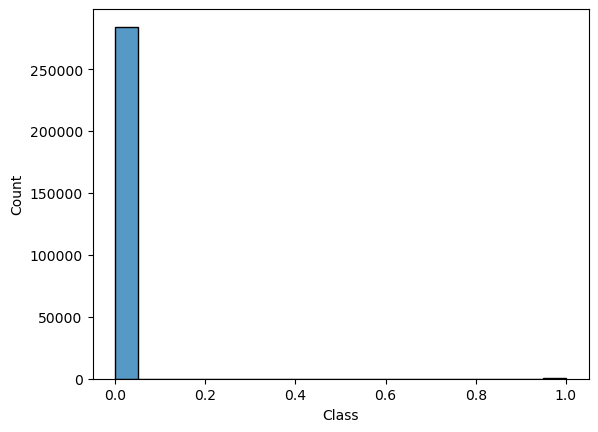

In [9]:
sns.histplot(data=df, x = 'Class')

Class distribution is very unbalanced. We have more than 90% instances in Class 0. If we use this data to train our machine learning model it wont be able to recognize the fraudulent transactions as the data is biased. It will most likely predict that the transaction is non fraudulent. 

### Data Preprocessing 

In [11]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

For Fraudulent transactions the Average amount is greater than Legit transactions

In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Fixing the Unbalanced Data

We are going to do **Under Sampling**. Build a sample dataset containing similar distribution of legit(normal) transaction and fraudulent transactions.

We have 492 fraudulent transactions. We will randomly select 492 datapoints from the normal transactions and join it with the 492 fraud transactions group. That way our sample will be well represented of both classes.

Drawing Random Sample:

In [18]:
legit_sample = legit.sample(n=492)

Concatenating with Fraud dataframe:

In [19]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168363,119189.0,1.949810,-0.273454,-1.807622,0.461749,0.395020,-0.782309,0.490524,-0.359721,0.427729,...,-0.119240,-0.371151,0.019246,-0.750335,0.061527,0.264564,-0.089067,-0.060248,90.59,0
243060,151772.0,-1.339698,2.047553,-0.736134,-0.487919,-0.340004,-0.133010,-1.595232,-4.979566,-0.767306,...,-2.726926,0.246490,0.570911,0.006033,-0.595105,0.106135,0.060783,0.103520,15.98,0
245790,152910.0,2.083430,-0.118322,-3.915262,-0.790516,3.226142,2.634061,0.464299,0.412870,0.039689,...,0.315504,0.989843,-0.217134,0.769452,0.933581,-0.176830,-0.036537,-0.084485,23.59,0
103107,68501.0,-0.869197,0.049327,1.973999,0.078792,0.577374,0.658666,-0.376066,0.603322,0.277752,...,0.274829,0.701712,-0.211822,-0.850540,-0.186204,-0.378689,0.159882,0.137270,1.00,0
249867,154614.0,2.072556,0.052586,-2.016721,-0.030587,0.436332,-1.484131,0.678915,-0.435754,-0.007099,...,0.207564,0.699409,-0.033507,0.067216,0.369303,0.221939,-0.089124,-0.089299,4.62,0


In [21]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

Now we have a Uniformly Distributed Data

In [22]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96081.729675,-0.017009,0.138632,-0.012332,-0.041439,0.047835,-0.034612,0.076483,-0.062231,-0.118116,...,0.001855,0.052822,-0.004436,0.004274,-0.012782,-0.029507,-0.048131,0.031668,0.005916,83.696240
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We can compare the mean values of the other variable now with the previous groupby().mean() and values are almost similar, which shows that our sample is a good sample.

#### Splitting the Data into Features and Target

In [23]:
X = new_df.drop(['Class'], axis=1)
y = new_df['Class']

X

In [25]:
y

168363    0
243060    0
245790    0
103107    0
249867    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

#### Train Test Split of Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Data Splitting is successful !

#### Train the Model

In [29]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [33]:
# Accuracy Score on Training Data
X_train_pred = model.predict(X_train)

In [35]:
test_accuracy = accuracy_score(X_train_pred, y_train)
print(f"The Accuracy score is {test_accuracy}")

The Accuracy score is 0.9161372299872935


In [36]:
# Accuracy Score on Test Data
y_pred = model.predict(X_test)

In [37]:
test_accuracy = accuracy_score(y_pred, y_test)
print(f"The Accuracy score is {test_accuracy}")

The Accuracy score is 0.8934010152284264


### Conclusion

**The Accuracy Score on Training Data and Test Data are pretty close, so our model has performed well. We can use this model to predict if a transaction will be fraudulent or not.** 

If the Training Data accuracy was low and Test Data accuracy was high then it would mean that our model is overfitted. If on the other hand if Training Data accuracy is very high and Test Data accuracy is low then model is underfitted.